In [9]:
import pandas as pd

lr = pd.read_csv('../results/logistic_regression_results.csv')
rf = pd.read_csv('../results/random_forest_results.csv')
xgb = pd.read_csv('../results/xgboost_results.csv')

comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [lr['accuracy'][0], rf['accuracy'][0], xgb['accuracy'][0]],
    'Precision': [lr['precision'][0], rf['precision'][0], xgb['precision'][0]],
    'Recall': [lr['recall'][0], rf['recall'][0], xgb['recall'][0]],
    'F1 Score': [lr['f1_score'][0], rf['f1_score'][0], xgb['f1_score'][0]],
    'ROC AUC': [lr['roc_auc'][0], rf['roc_auc'][0], xgb['roc_auc'][0]]
})

latex_table = comparison.to_latex(
    index=False,
    float_format="%.3f",
    caption="Model Performance Comparison",
    label="tab:model_comparison"
)

print(latex_table)

\begin{table}
\caption{Model Performance Comparison}
\label{tab:model_comparison}
\begin{tabular}{lrrrrr}
\toprule
Model & Accuracy & Precision & Recall & F1 Score & ROC AUC \\
\midrule
Logistic Regression & 0.650 & 0.752 & 0.669 & 0.708 & 0.696 \\
Random Forest & 0.745 & 0.745 & 0.907 & 0.818 & 0.809 \\
XGBoost & 0.746 & 0.768 & 0.859 & 0.811 & 0.803 \\
\bottomrule
\end{tabular}
\end{table}



In [2]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc
# Probabilities from each model
lr = pd.read_csv('../results/logistic_regression_test_predictions.csv')
rf = pd.read_csv('../results/random_forest_test_predictions.csv')
xgb = pd.read_csv('../results/xgb_test_predictions.csv')
y_test = lr['y_test']

lr_probs = lr['lr_prob']
rf_probs = rf['rf_prob']
xgb_probs = xgb['xgb_prob']

In [3]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

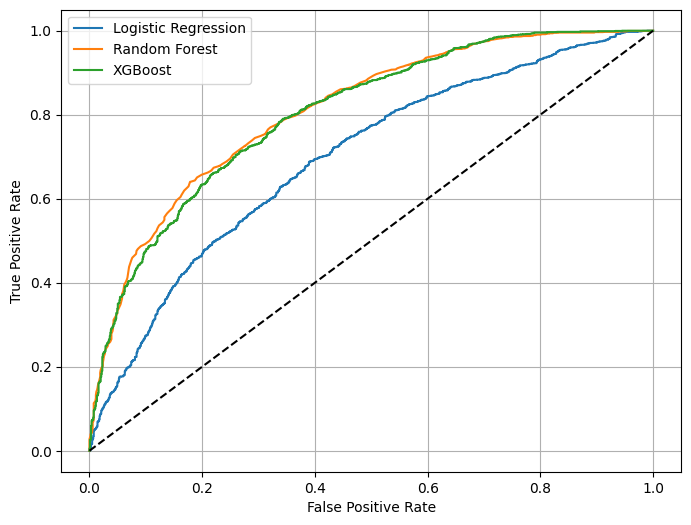

In [10]:
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression')
plt.plot(rf_fpr, rf_tpr, label='Random Forest')
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

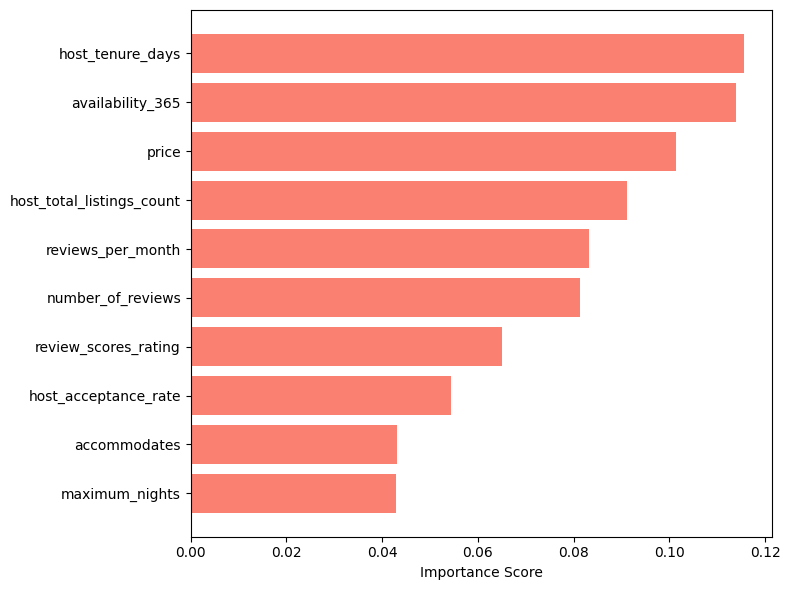

In [14]:
rf_imp = pd.read_csv('../results/random_forest_feature_importances.csv')
xgb_imp = pd.read_csv('../results/xgboost_feature_importances.csv')

top_rf_features = rf_imp.head(10)
plt.figure(figsize=(8, 6))
plt.barh(top_rf_features['feature'], top_rf_features['importance'], color='salmon')
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

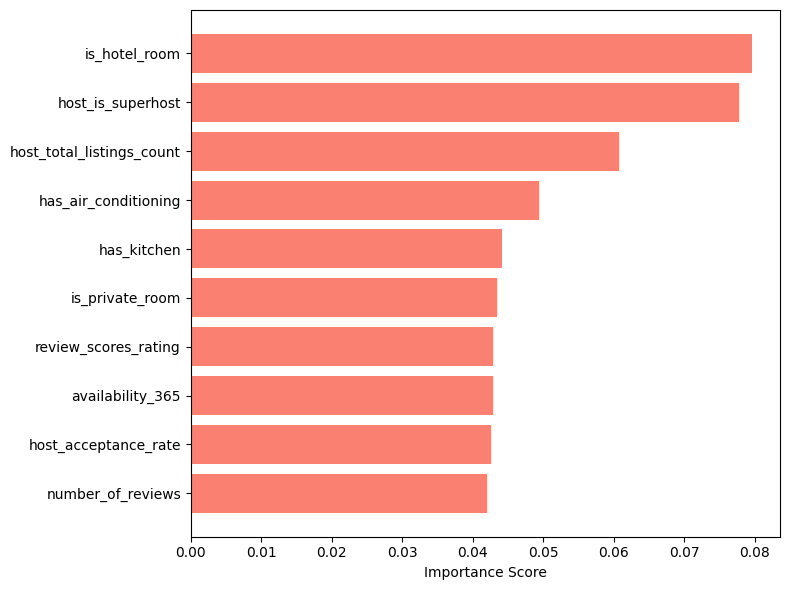

In [12]:
top_xgb_features = xgb_imp.head(10)
plt.figure(figsize=(8, 6))
plt.barh(top_xgb_features['feature'], top_xgb_features['importance'], color='salmon')
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

In [8]:
df = pd.read_csv('../data/cleaned_austin_v3.csv')
survivors = df[df['survived'] == 1]
churned = df[df['survived'] == 0]

top_features_rf = [
    'host_tenure_days',
    'availability_365',
    'price',
    'host_total_listings_count',
    'reviews_per_month',
    'number_of_reviews',
    'review_scores_rating',
    'maximum_nights',
    'review_scores_rating',
]

results = []

for feature in top_features_rf:
    survivor_med = survivors[feature].median()
    churned_med = churned[feature].median()
    diff = survivor_med - churned_med
    results.append([feature, survivor_med, churned_med, diff])

statistics_df = pd.DataFrame(
    results,
    columns=[
        'Feature',
        'Survivor Median',
        'Churned Median',
        'Difference',
    ],
)

# Sort by absolute difference
statistics_df['Abs Difference'] = statistics_df['Difference'].abs()
statistics_df = statistics_df.sort_values(by='Abs Difference', ascending=False)

statistics_df


,Feature,Survivor Median,Churned Median,Difference,Abs Difference
0,host_tenure_days,2686.00,2250.00,436.00,436.00
1,availability_365,91.00,165.00,-74.00,74.00
2,price,189.00,168.00,21.00,21.00
5,number_of_reviews,9.00,5.00,4.00,4.00
3,host_total_listings_count,2.00,5.00,-3.00,3.00
4,reviews_per_month,0.50,0.63,-0.13,0.13
6,review_scores_rating,4.93,4.93,0.00,0.00
7,maximum_nights,365.00,365.00,0.00,0.00
8,review_scores_rating,4.93,4.93,0.00,0.00
